In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses,optimizers
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model
from numpy.testing import assert_allclose
import pickle5 as pickle

In [ ]:
def AlexNet(input_shape, num_classes):
    model=tf.keras.models.Sequential()
    model.add(layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear", input_shape=input_shape))

    model.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4),activation='relu',input_shape=(227, 227,3),padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(layers.Conv2D(filters=256, kernel_size=(5,5), padding="same",activation="relu",strides=(1,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(layers.Conv2D(kernel_size=(3,3),filters=384,activation='relu',padding='same',strides=(1,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu',strides=(1,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes,activation='softmax'))
    return model

In [ ]:
num_classes = 100
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_full=tf.keras.utils.to_categorical(y_train_full,num_classes=num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
input_shape=x_train.shape[1:]
input_shape

(32, 32, 3)

In [ ]:

def train_model():
    # Create and compile your model
    model = AlexNet(input_shape, num_classes)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Define the checkpoint path
    checkpoint_path = "/content/checkpoint/model_{epoch}.h5"

    # Create a checkpoint callback
    checkpoint_callback = ModelCheckpoint(checkpoint_path, save_weights_only=False, save_freq='epoch')

    # Loop over 10 iterations
    for i in range(8):
        # Load the model from the checkpoint if available
        if i > 0:
            model = tf.keras.models.load_model(f"model_{i-1}.h5")

        # Train the model
        history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val), callbacks=[checkpoint_callback])

        # Save the model
        model.save(f"model_{i}.h5")

        # Save the history
        with open(f"history_{i}.pkl", 'wb') as file:
            pickle.dump(history.history, file)


In [ ]:
train_model()

Epoch 1/10
1250/1250 [==============================] - 75s 56ms/step - loss: 5.1646 - accuracy: 0.0233 - val_loss: 4.3859 - val_accuracy: 0.0343
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 4.4874 - accuracy: 0.0293 - val_loss: 4.3495 - val_accuracy: 0.0371
Epoch 3/10
1250/1250 [==============================] - 63s 50ms/step - loss: 4.3963 - accuracy: 0.0333 - val_loss: 4.1496 - val_accuracy: 0.0492
Epoch 4/10
1250/1250 [==============================] - 70s 56ms/step - loss: 4.3253 - accuracy: 0.0410 - val_loss: 4.0803 - val_accuracy: 0.0658
Epoch 5/10
1250/1250 [==============================] - 68s 54ms/step - loss: 4.1883 - accuracy: 0.0571 - val_loss: 4.0668 - val_accuracy: 0.0810
Epoch 6/10
1250/1250 [==============================] - 68s 54ms/step - loss: 3.9818 - accuracy: 0.0851 - val_loss: 3.6601 - val_accuracy: 0.1404
Epoch 7/10
1250/1250 [==============================] - 67s 54ms/step - loss: 3.7317 - accuracy: 0.1242 - val_loss: 3.4100 -

In [ ]:
for i in range(4,10):
  print(i)

4
5
6
7
8
9


In [7]:
def plot_history(history):
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()


IsADirectoryError: [Errno 21] Is a directory: '/home/panda/Downloads'

/home/panda/Collage/Computer Intellegence/Optimization-Image-Classifiers/Milestone_2


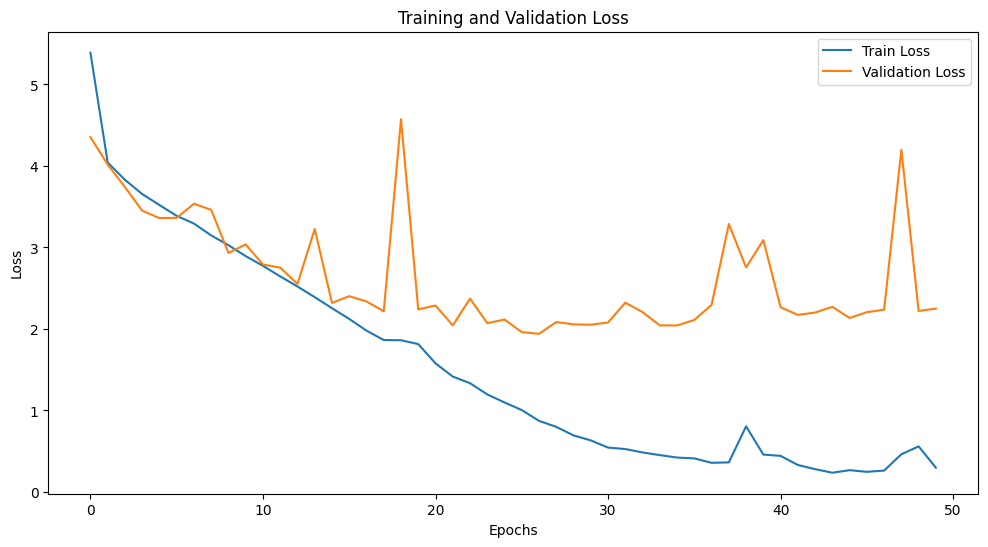

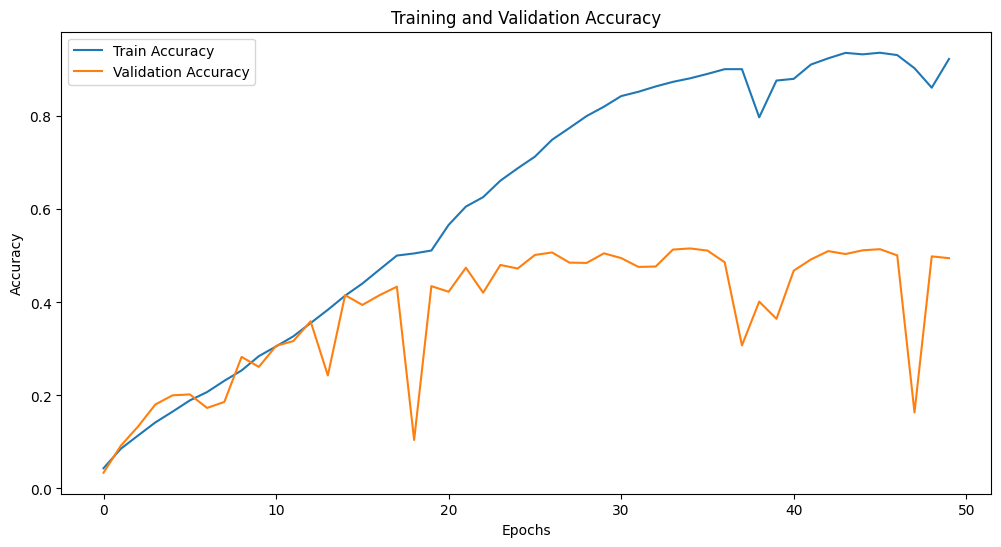

In [9]:
import os
print(os.getcwd())
with open("/home/panda/Downloads/history_alex.pkl", 'rb') as f:
    history = pickle.load(f)

# Plot combined history
plot_history(history)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 2.6697161197662354
Test accuracy: 0.33799999952316284
